# Audio Processing Using Librosa for Beginners
**Cornell Birdcall Identification : Build tools for bird population monitoring**

-----------------------------------------------------------------------------------------------------------------------------------

#### This Notebook is for absolute beginners who is starting out in audio processing. In this notebook, we will be using Librosa Library to load and analyze the audios.

![](https://i.imgur.com/jsKJ4rF.jpg) 
 
## Table of Contents:
* [**Introduction**](#intro)
* [**Libraries used**](#lib)
* [**Relevant features for Loading Audios**](#rel)
* [**Selecting a Species for Analysis**](#sel)
* [**Audio Loading**](#load)
* [**Visualizing the Audio**](#viz)
* [**Features**](#feat)
    * [Mel-Frequency Cepstral Coefficients](#mcc)
    * [Zero-crossing rate](#zcr)
    * [Spectral Centroid](#cen)
    * [Spectral Bandwidth](#band)
    * [Spectral-roll off](#roll)
    * [Chroma Vector feature](#chroma)
    * [Pitch and Magnitude](#pit)
* [**Conclusion**](#conc)
 



<a id="intro"></a>
# Introduction

Over 10,000 bird species occur in the world, and they can be found in nearly every environment, from untouched rainforests to suburbs and even cities. Birds play an essential role in nature. They are high up in the food chain and integrate changes occurring at lower levels. As such, birds are excellent indicators of deteriorating habitat quality and environmental pollution. However, it is often easier to hear birds than see them. With proper sound detection and classification, researchers could automatically intuit factors about an area’s quality of life based on a changing bird population.

In this Kaggle competition, **The Cornell Lab of Ornithology’s Center for Conservation Bioacoustics**(CCB) provided a wide variety of bird vocalizations in soundscape recordings. Indepth and efficient analysis and inference on this can help the researchers to make better steps towards nature conservation.

This is a wide area and it requires strong technical knowledge to give out a useful result. The first and foremost task towards this goal is analyzing the audio given to us and deduce some information from those.

Working with audios are not a common task a typical Data science enthusiast goes through. **This notebook will help you with some basic ideas and concepts to start out with audio processing. So let's dive in...**

<a id="lib"></a>
# Libraries Used

## Librosa
> LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. The documentation for the library is available [here](https://librosa.org/librosa/). Go through the official tutorial of the same [here](https://librosa.org/librosa/tutorial.html). In case you are the person who always want to eat it from the research paper, [here](http://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf) it is.**

## IPython.display.Audio
> IPython.display.Audio will let you play audio directly in a jupyter notebook.**

Before getting into the technical complications and the code syntax, it is important to know how sound works. It is not mandatory but always a upperhand to know and understand the math behind sounds. A general understanding is cool too. This video, [What's Noise](https://www.youtube.com/watch?v=i_0DXxNeaQ0) will help you understand a bit about sound, if not all.

An audio signal is represented in the form of an audio signal having parameters such as frequency, bandwidth, decibel etc. A typical audio signal can be expressed as a function of Amplitude and Time. The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency.

![Imgur](https://i.imgur.com/5c82I1B.jpg)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename);

**First let's read the train.csv file and understand the features inside.**

In [2]:
train = pd.read_csv('../input/birdsong-recognition/train.csv')
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


<a id="rel"></a>
## Relevant features in the train.csv data are:

* ebird_code: a code for the bird species. You can review detailed information about the bird codes by appending the code to https://ebird.org/species/, such as https://ebird.org/species/amecro for the American Crow.
* recodist: the user who provided the recording.
* location: where the recording was taken. Some bird species may have local call 'dialects', so you may want to seek geographic diversity in your training data.
* date: while some bird calls can be made year round, such as an alarm call, some are restricted to a specific season. You may want to seek temporal diversity in your training data.
* filename: the name of the associated audio file.
* species: the full name of the species.


<a id="sel"></a>
## Selecting a Species

**From the dataset, we can focus on a certain bird species and analyze the sound/call of that particular bird. The ebird_code can be used to know more about that bird, corresponding filename can be used to deduce the audio from the input and the species name is available in the species column.**

In [3]:
train.head(1)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0


> **Consider the species Alder Flycatcher. The ebird_code of the species is aldfly and the audio of the species is stored as XC134874.mp3 in aldfly directory inside train_audio. Using these details, we can display the extended information of the particular species from the [ebird](https://ebird.org/species/) site.**

In [4]:
bird_code = train['ebird_code'].iloc[0]
filename = train['filename'].iloc[0]

In [5]:
from IPython.display import IFrame

ebird_code_path = 'https://ebird.org/species/'
IFrame(ebird_code_path+bird_code, width=1200, height=600)


<a id="load"></a>
## Loading the Audio

**Using the librosa library we can now load the audio from the filename given in the data. We can also playback the audio using Ipython.display library.**

In [6]:
import librosa
audio_data = '/kaggle/input/birdsong-recognition/train_audio/'
x , sr = librosa.load(audio_data+bird_code+'/'+filename)

/opt/conda/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


**.load loads an audio file and decodes it into a 1-dimensional array which is a time series x , and sr is a sampling rate of x . Default sris 22kHz. We can override the sr using the sr parameter in load().**

In [7]:
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(562011,) 22050


In [8]:
import IPython.display as ipd
ipd.Audio(audio_data+bird_code+'/'+filename)

<a id="ext"></a>
## Feature Extraction

The data provided of audio cannot be understood by the models directly. So it is required to convert them into an understandable format. For this, feature extraction is used. It is a very important part in analysis and classification of the audio. We got to know feature extraction is inevitable in the case of audios. Now let's go through some of the techniques used for extracting features of music.

<a id="viz"></a>
## Visualizing the Audio
### Waveplot
**Here, we plot a naive waveplot of the audio. Waveplots let us know the loudness of the audio at a given time.**

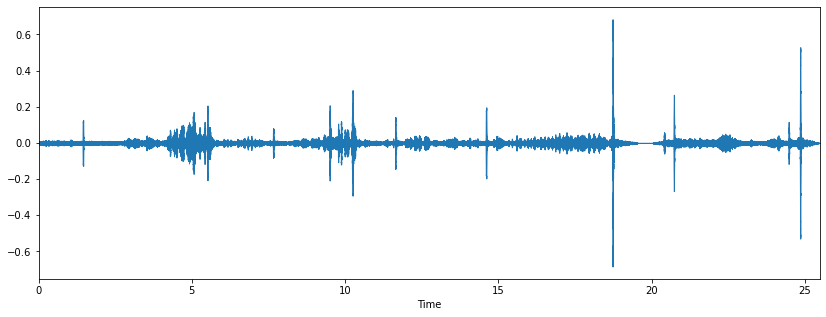

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

### Spectogram

**A spectrogram is a visual representation of the spectrum of frequencies of sound as they vary with time. It’s a representation of frequencies changing with respect to time for given music signals.'.stft' converts data into short term Fourier transform. STFT converts signal such that we can know the amplitude of given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.**

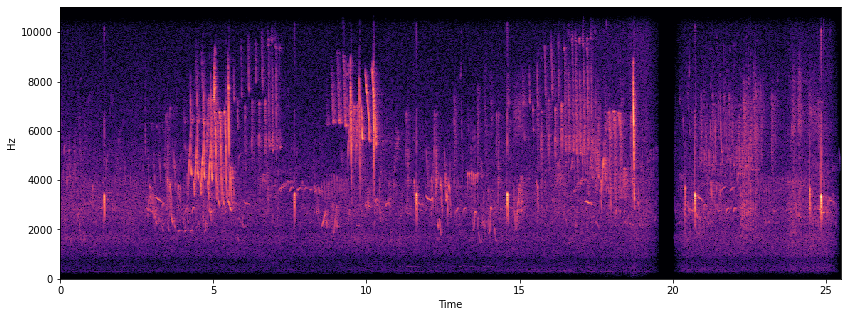

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

<a id="feat"></a>
**For any ML experiment, it is required to transform the collected data to features, which can then be fed into an algorithm. Below are some of the most important features that may be needed to build a model for an audio classification task:**
1. Mel-Frequency Cepstral Coefficients
2. Zero-crossing rate
3. Spectral Centroid
4. Spectral Bandwidth
5. Spectral-roll off
6. Chroma Vector feature
7. Pitch and Magnitude

<a id="mcc"></a>
## 1. Mel Frequency Cepstral Coefficients (MFCCs)
**The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.**

In [11]:
#mcc
mfccs = librosa.feature.mfcc(y=x, sr=sr)

In [12]:
print(mfccs.shape)

(20, 1098)


In this case, mfcc computed 20 MFCCs over 1098 frames.

The very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. It only conveys a constant offset, i.e. adding a constant value to the entire spectrum. Therefore, many practitioners will discard the first MFCC when performing classification.

Display the MFCCs:


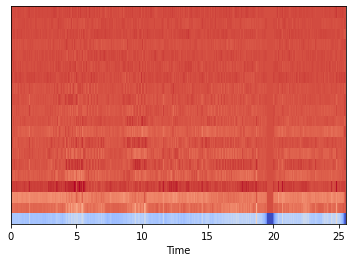

In [13]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<a id="zcr"></a>
## 2. Zero Crossing Rate
The zero crossing rate indicates the number of times that a signal crosses the horizontal axis.
Let's Zoom in and make the wave simpler so that we can calculate Zero crossing rate manually and verify.

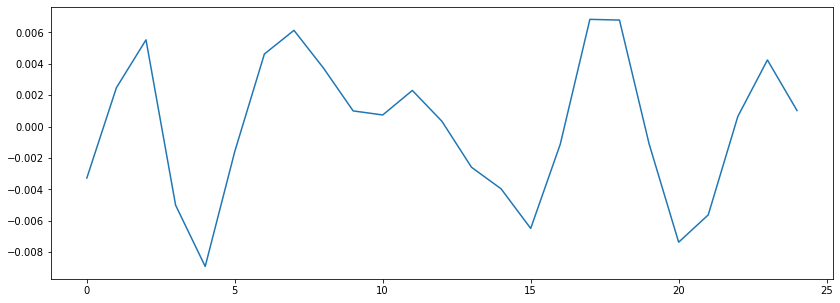

In [14]:
#zero crossing
n0 = 7000
n1 = 7025
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])

In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

In [16]:
zero_crossings.shape

(25,)

In [17]:
zero_crossings.sum()

7

This gives the zero_crossings. We can verify this manually from the plot itself. There are clearly 7 zero crossings in the plot. Now we can use the whole audio to go through this and deduce the zero crossings of the whole data.

In [18]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)

(1, 1098)


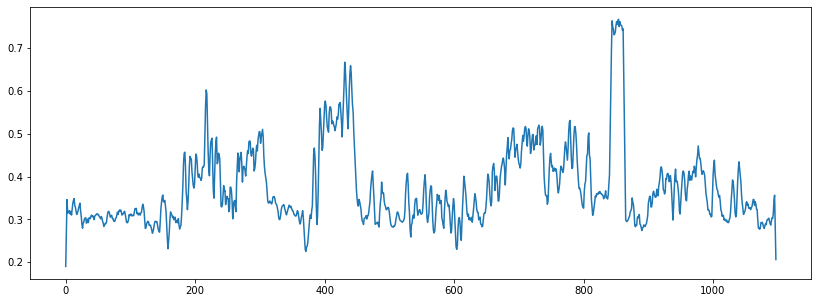

In [19]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

<div id="cen"></a>
## 3. Spectral Centroid
The spectral centroid (Wikipedia) indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean:
> fc=∑kS(k)f(k)∑kS(k)

where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

In [20]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1098,)

In [21]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [22]:
import sklearn
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

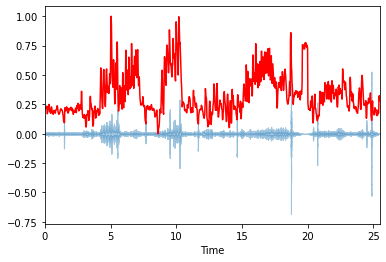

In [23]:
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

<a id="band"></a>
## 4.Spectral Bandwidth

librosa.feature.spectral_bandwidth computes the order-p

spectral bandwidth:
> (∑kS(k)(f(k)−fc)p)1p

where S(k)
is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k, and fc is the spectral centroid. When p=2, this is like a weighted standard deviation.

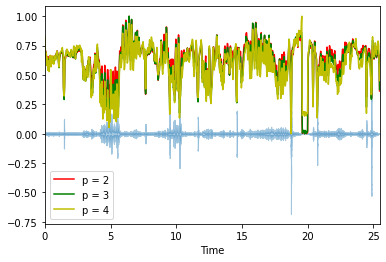

In [24]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

<a id="roll"></a>
## 5. Spectral-roll off
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies.

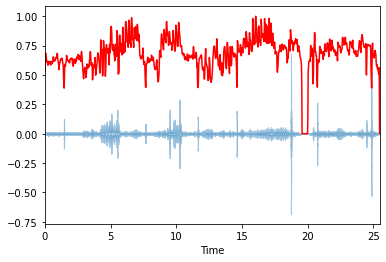

In [25]:
#Spectral-roll off
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

<a id="chroma"></a>
## 6. Chroma Feature
A chroma vector (Wikipedia) (FMP, p. 123) is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

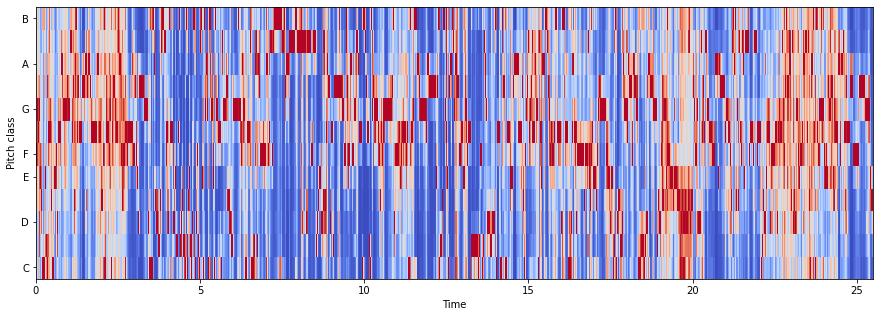

In [26]:
#chroma features
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')

<a id="pit"></a>
## 7. Pitches and Magnitudes
Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale, or more commonly, pitch is the quality that makes it possible to judge sounds as "higher" and "lower" in the sense associated with musical melodies.

In [27]:
pitches, magnitudes = librosa.piptrack(y=x, sr=sr)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
print(magnitudes)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<a id="conc"></a>
# Conclusion
**These are some of the features that can be used for classification of audio data. This could help not just in this dataset. It is applicable in almost any audio processing. The notebook is specifically created in order to make it most general as possible so that we can use it for any audio related data. I used the official page of Librosa and the github repo to make this notebook. Kudos to all the heads behind this library. It really makes life easy for Data scientist who want to play around with music. I hope this help beginners start out in Audio processing and analysis field. The content of the notebook is kind of a starter kit. There's a whole lot to explore. So why waiting? Get Started...**